<div style="
    text-align: center;
    font-size: 48px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
  

</div>


<div style="
    text-align: center;
    font-size: 48px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;
    border-bottom: 3px solid #000000;">
    LOS ANGELES CRIME 
</div>


<div style="text-align: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThUsuZoIYQ1smOzyvV96baiOBTr7dI59zXCQ&s" alt="Alt text" width="700">
</div>




# Group number 13
## Presenting by:
###  Baral Levi  
### Ella Admoni
### Tomer Meirovich 

## links:

####  Kaggle: https://www.kaggle.com/datasets/asaniczka/crimes-in-los-angeles-2020-2023
####  GitHub : https://github.com/BareLevi/Project_Ella_Tomer_Barel/blob/main/Ella_Tomer_bBarel_project_updated.ipynb




In [224]:
### קריאת הקובץ סידור יצירת עמודות רלוונטיות

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


In [226]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 





In [227]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60:
            return "old"
        else:    
            return "unknown"


df["age_description"] = df["victim_age"].apply(age_category)


In [228]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])


def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)

In [229]:
df['hour_occurred'] = pd.to_datetime(df['date_occurred']).dt.hour


In [230]:
df['day_of_week'] = df['date_occurred'].dt.day_name()


In [231]:
df['year_occurred'] = df['date_occurred'].dt.year

In [232]:
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = df['date_occurred'].apply(categorize_time)

In [233]:
def classify_weapon(weapon_description):
    firearm_keywords = ['PISTOL', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'FIREARM', 'GUN', 'ASSAULT WEAPON', 'MAC', 'UZI', 'HECKLER & KOCH', 'EXPLOXIVE DEVICE', 'AUTOMATIC WEAPON', 'SEMI-AUTOMATIC', 'STARTER PISTOL', 'M1-1', 'M-14', 'BOMB', 'BOMB THREAT']
    sharp_keywords = ['KNIFE', 'SWORD', 'BLADE', 'SCISSORS', 'AXE', 'SCREWDRIVER', 'DIRK', 'DAGGER', 'CLEAVER', 'RAZOR', 'ICE PICK', 'BOWIE KNIFE', 'STRAIGHT RAZOR', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT']
    vehicle_keywords = ['VEHICLE']
    fire_bomb_keywords = ['FIRE', 'EXPLOXIVE DEVICE']
    threat_keywords = ['VERBAL THREAT', 'DEMAND NOTE', 'BOMB THREAT']
    improvised_keywords = ['ROCK', 'THROWN OBJECT', 'BLUNT INSTRUMENT', 'BOTTLE', 'CLUB', 'BAT', 'PIPE', 'STICK', 'HAMMER', 'GLASS', 'BRICK', 'BOARD', 'BELT', 'CHAIN', 'MARTIAL ARTS', 'CONCRETE BLOCK', 'SIMULATED GUN', 'MACE', 'PEPPER SPRAY', 'TOY GUN', 'SYRINGE', 'LIQUOR', 'DRUGS', 'FIXED OBJECT', 'BLACKJACK', 'RELIC FIREARM', 'AIR PISTOL', 'CAUSTIC CHEMICAL', 'POISON', 'BRASS KNUCKLES', 'TIRE IRON', 'DOG/ANIMAL (SIC ANIMAL ON)', 'SCALDING LIQUID', 'ROPE/LIGATURE', 'BOW AND ARROW']
    physical_keywords = ['STRONG-ARM', 'HANDS', 'FIST', 'FEET', 'BODILY FORCE', 'PHYSICAL PRESENCE']
    
    if pd.isna(weapon_description):
        return "NaN"
    
    if 'UNKNOWN WEAPON' in weapon_description or 'OTHER WEAPON' in weapon_description:
        return 'Unknown Weapon'
    if any(keyword in weapon_description for keyword in firearm_keywords):
        return 'firearm'
    elif any(keyword in weapon_description for keyword in sharp_keywords):
        return 'sharp weapon'
    elif any(keyword in weapon_description for keyword in vehicle_keywords):
        return 'vehicles'
    elif any(keyword in weapon_description for keyword in fire_bomb_keywords):
        return 'fire and bombs'
    elif any(keyword in weapon_description for keyword in threat_keywords):
        return 'threats'
    elif any(keyword in weapon_description for keyword in improvised_keywords):
        return 'improvised weapon'
    elif any(keyword in weapon_description for keyword in physical_keywords):
        return 'Physical strength'
    else:
        return 'OTHER'


df['weapon_category'] = df['weapon_description'].apply(classify_weapon)


In [234]:
#df['date_reported'] = pd.to_datetime(df['date_reported']).dt.date
#df['day_diff'] = (pd.to_datetime(df['date_reported']) - df['date_occurred']).dt.days

In [235]:
df.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude', 'age_description',
       'period_occurred', 'hour_occurred', 'day_of_week', 'year_occurred',
       'day_time', 'weapon_category'],
      dtype='object')

### Splitting the file into categories

In [236]:
violence_df = df[df['crime_description'].isin(['BATTERY - SIMPLE ASSAULT',
                                         'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                         'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                         'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                         'ARSON',
                                         'INTIMATE PARTNER - SIMPLE ASSAULT',
                                         'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                         'BRANDISH WEAPON',
                                         'OTHER ASSAULT',
                                         'SHOTS FIRED AT INHABITED DWELLING',
                                         'KIDNAPPING - GRAND ATTEMPT',
                                         'DISCHARGE FIREARMS/SHOTS FIRED',
                                         'KIDNAPPING',
                                         'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                         'CRIMINAL HOMICIDE',
                                         'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                         'BATTERY ON A FIREFIGHTER',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                         'CRUELTY TO ANIMALS',
                                         'LYNCHING - ATTEMPTED',
                                         'MANSLAUGHTER, NEGLIGENT',
                                         'LYNCHING'])]
crime_list1 = [
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
    'THEFT PLAIN - PETTY ($950 & UNDER)',
    'ROBBERY',
    'BURGLARY',
    'VEHICLE - STOLEN',
    'BUNCO, GRAND THEFT',
    'THEFT OF IDENTITY',
    'BIKE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'EXTORTION',
    'CHILD STEALING',
    'ATTEMPTED ROBBERY',
    'PURSE SNATCHING',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'BUNCO, PETTY THEFT',
    'BUNCO, ATTEMPT',
    'THEFT PLAIN - ATTEMPT',
    'SHOPLIFTING - ATTEMPT',
    'THEFT FROM PERSON - ATTEMPT',
    'VEHICLE - ATTEMPT STOLEN',
    'BURGLARY FROM VEHICLE, ATTEMPTED',
    'PICKPOCKET',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'TILL TAP - PETTY ($950 & UNDER)',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'PETTY THEFT - AUTO REPAIR',
    'BOAT - STOLEN',
    'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN',
    'BRIBERY',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    'GRAND THEFT / INSURANCE FRAUD',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'GRAND THEFT / AUTO REPAIR',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

Thefts_and_frauds = df[df['crime_description'].isin(crime_list1)]

crime_list2 = [
    'RAPE, FORCIBLE',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
    'BATTERY WITH SEXUAL CONTACT',
    'LETTERS, LEWD - TELEPHONE CALLS, LEWD',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'INDECENT EXPOSURE',
    'ORAL COPULATION',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'PIMPING',
    'RAPE, ATTEMPTED',
    'CHILD PORNOGRAPHY',
    'PEEPING TOM',
    'PANDERING',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'
]


sex_crimes = df[df['crime_description'].isin(crime_list2)]



### Data validation check

In [237]:
missing_values_by_column = df.isnull().sum()


result_df = pd.DataFrame({
    'column name': missing_values_by_column.index,
    'Amount of missing values': missing_values_by_column.values
})
missing_values_by_column 

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112616
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
age_description             0
period_occurred             0
hour_occurred               0
day_of_week                 0
year_occurred               0
day_time                    0
weapon_cat

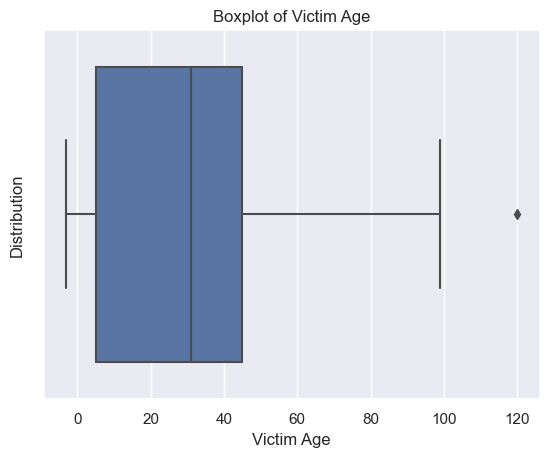

In [238]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [239]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [240]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [241]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


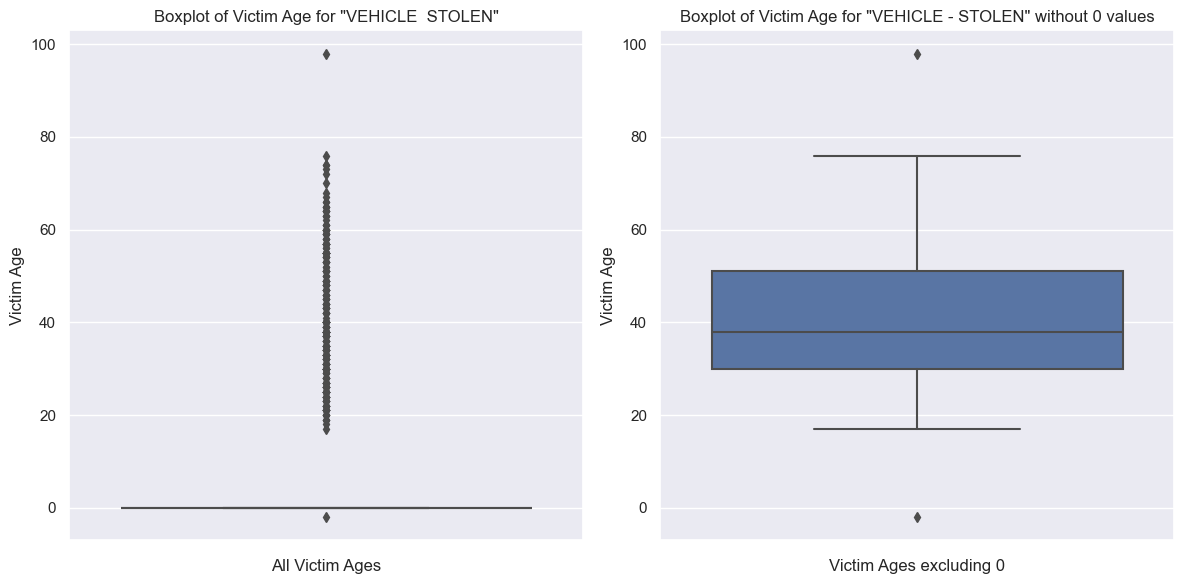

In [242]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [243]:
earliest_date = df['date_occurred'].min()
latest_date = df['date_occurred'].max()

print(f"The earliest date is: {earliest_date}")
print(f"The latest date is: {latest_date}")

The earliest date is: 2020-01-01 00:01:00
The latest date is: 2023-12-04 23:00:00


In [244]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

In [245]:
### אלימות פיזית ילדים ונערים

In [246]:
relevant_crimes = [
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',"BATTERY - SIMPLE ASSAULT","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL",
    "OTHER ASSAULT"
    
    
]

Under_age_18_df = df[(df["age_description"] == "child") | (df["age_description"] == "teenager")]
Under_age_18_df = Under_age_18_df[Under_age_18_df['crime_description'].isin(relevant_crimes)]









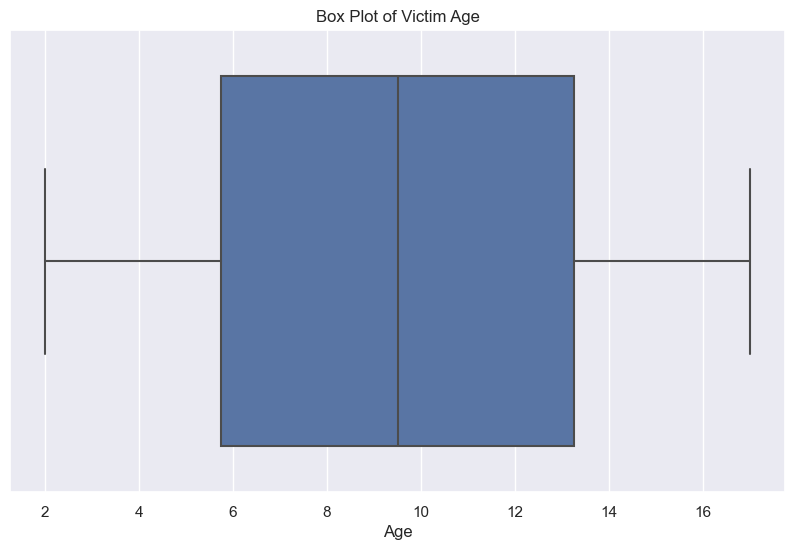

In [247]:
age_counts = Under_age_18_df['victim_age'].value_counts().reset_index()
age_counts.columns = ['victim_age', 'count']

plt.figure(figsize=(10,6))
sns.boxplot(x=age_counts["victim_age"])
plt.title('Box Plot of Victim Age')
plt.xlabel('Age')
plt.show()

In [248]:
child_df = Under_age_18_df[Under_age_18_df["age_description"] == "child"]
child_df_place_count = child_df['premise_description'].value_counts().reset_index()
child_df_place_count.columns = ["place_description", "amount"]



teenager_df = Under_age_18_df[Under_age_18_df["age_description"] == "teenager"]
teenager_df_place_count = teenager_df['premise_description'].value_counts().reset_index()
teenager_df_place_count.columns = ["place_description", "amount"]




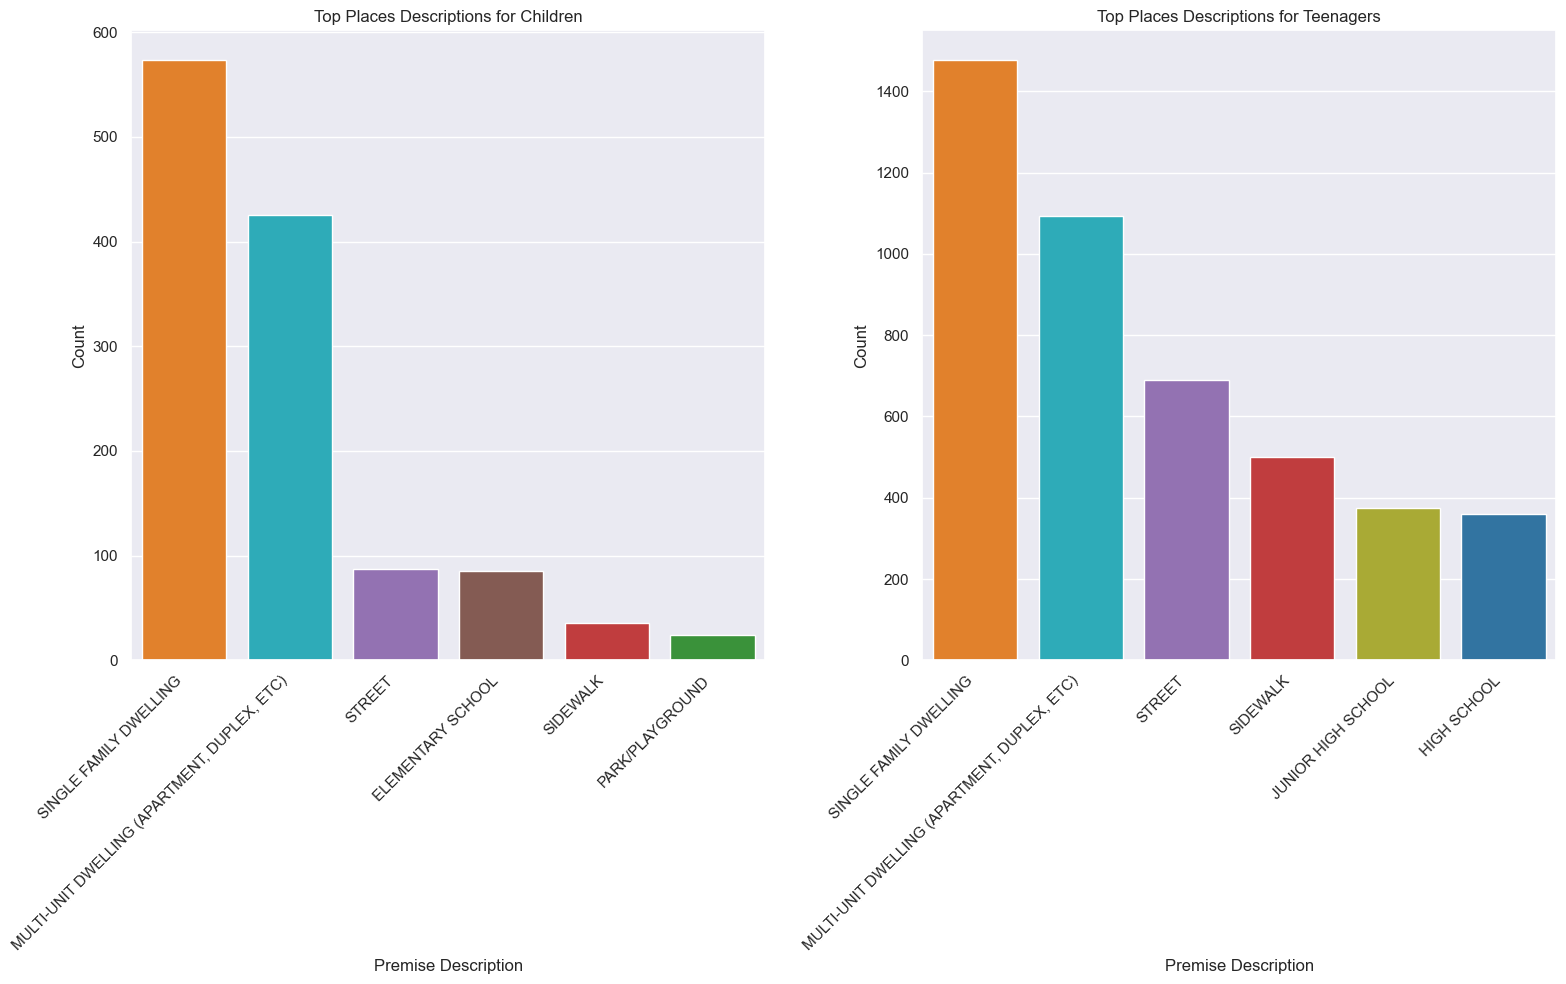

In [249]:
top_child_places = child_df_place_count.head(6)
top_teenager_places = teenager_df_place_count.head(6)


common_places = set(top_child_places['place_description']).intersection(set(top_teenager_places['place_description']))


custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#bcbd22']  # כחול, כתום, ירוק, אדום, סגול, חום, טורקיז, צהוב ירקרק
unique_places = list(set(top_child_places['place_description']).union(set(top_teenager_places['place_description'])))
color_mapping = {place: custom_palette[i % len(custom_palette)] for i, place in enumerate(unique_places)}


plt.figure(figsize=(16, 10))


plt.subplot(1, 2, 1)
sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Children')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Teenagers')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

ניתן להבחין שכאשר מדובר על פשעי אלימות ופשעי מין,בשתי קבוצות הגילאים שבשתי המקומות הראשונים מופיעים מקומות מגורים

##### ניצור עמודה חדשה שתעזור לנו להבין האם המקרים קרו במתחמי מגורים,בבית ספר, במקומות אחרים

In [250]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]




def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    else:
        return 'Non-Residential and Non-Schools'

Under_age_18_df['where_did_it_happen'] = Under_age_18_df['premise_description'].apply(categorize_premise)
### בנינו פונקציה שבודקת האם המקרה קרה מתחם מגורים למשל סוגרי דירות למינהם 

In [251]:
Under_age_18_df_value_counts = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
Under_age_18_df_value_counts.columns = ['where_did_it_happen', 'count']
Under_age_18_df_value_counts

,where_did_it_happen,count
0,Residential Areas,3806
1,Non-Residential and Non-Schools,2429
2,Schools,974


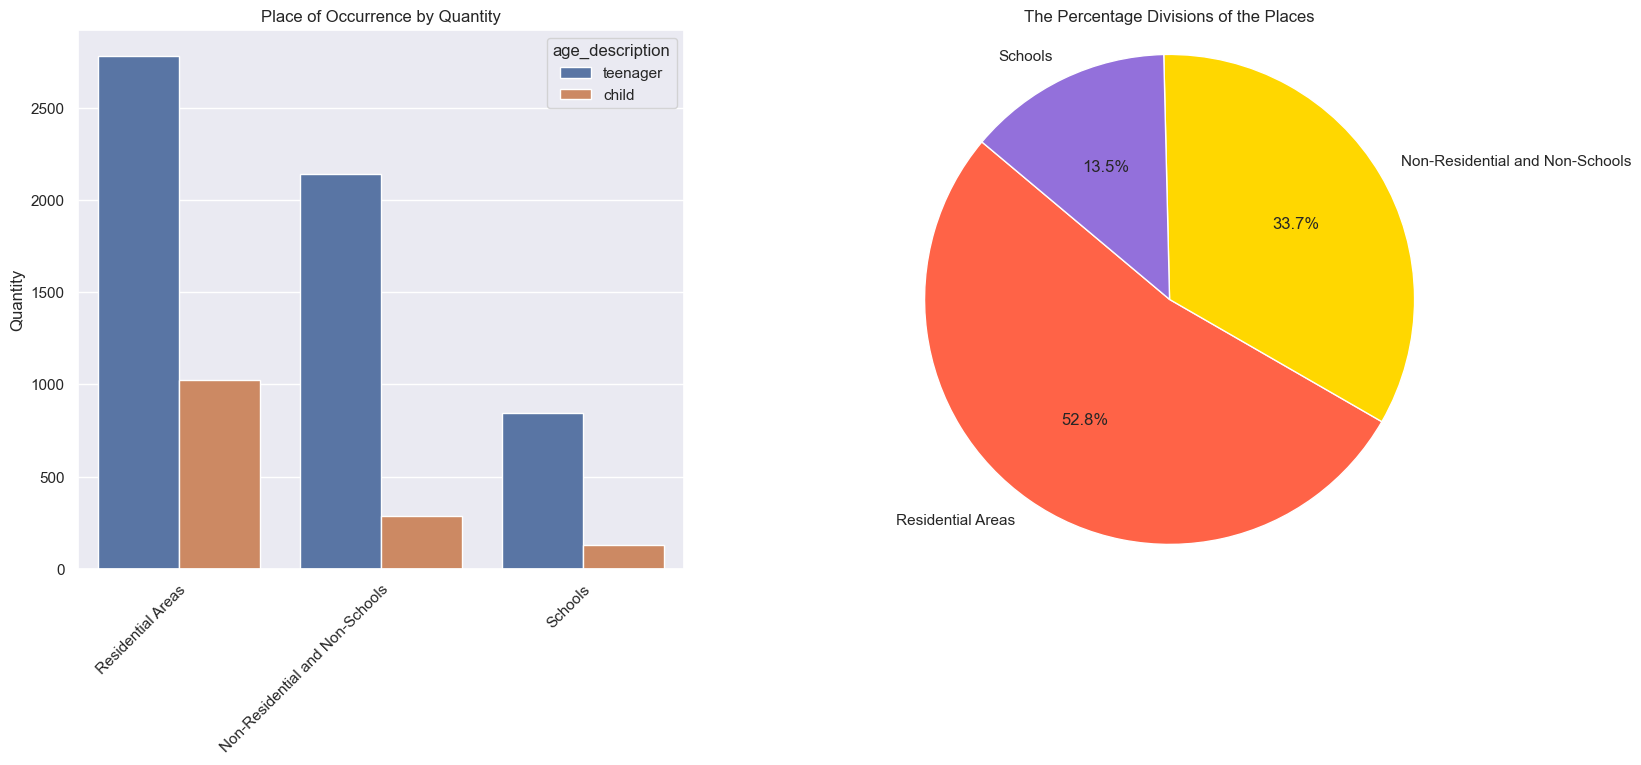

In [252]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))


sns.countplot(data=Under_age_18_df[Under_age_18_df['where_did_it_happen'] != 'Unknown'], hue='age_description', x='where_did_it_happen', order=Under_age_18_df_value_counts['where_did_it_happen'], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[0].set_title('Place of Occurrence by Quantity')
ax[0].set_xlabel('')
ax[0].set_ylabel('Quantity')


pie_data = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
pie_data.columns = ['where_did_it_happen', 'count']
colors = ['#FF6347', '#FFD700', '#9370DB']  # Matte red, yellow, and purple
ax[1].pie(pie_data['count'], labels=pie_data['where_did_it_happen'], autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_title('The Percentage Divisions of the Places')
ax[1].axis('equal')


plt.subplots_adjust(wspace=0.3)
plt.show()

נתונים מדאיגים מצביעים על כך שגם עבור ילדים וגם עבור בני נוער המקומות שבהם הם הכי חשופים לאלימות הם דווקא בבית

In [253]:
all_population_df = df[df['crime_description'].isin(relevant_crimes)]
all_population_df['where_did_it_happen'] = all_population_df['premise_description'].apply(categorize_premise)

all_population_value_counts = all_population_df['where_did_it_happen'].value_counts().reset_index()
all_population_value_counts.columns = ['where_did_it_happen', 'count']
all_population_value_counts

C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\3409849938.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,where_did_it_happen,count
0,Non-Residential and Non-Schools,46887
1,Residential Areas,27489
2,Schools,1267


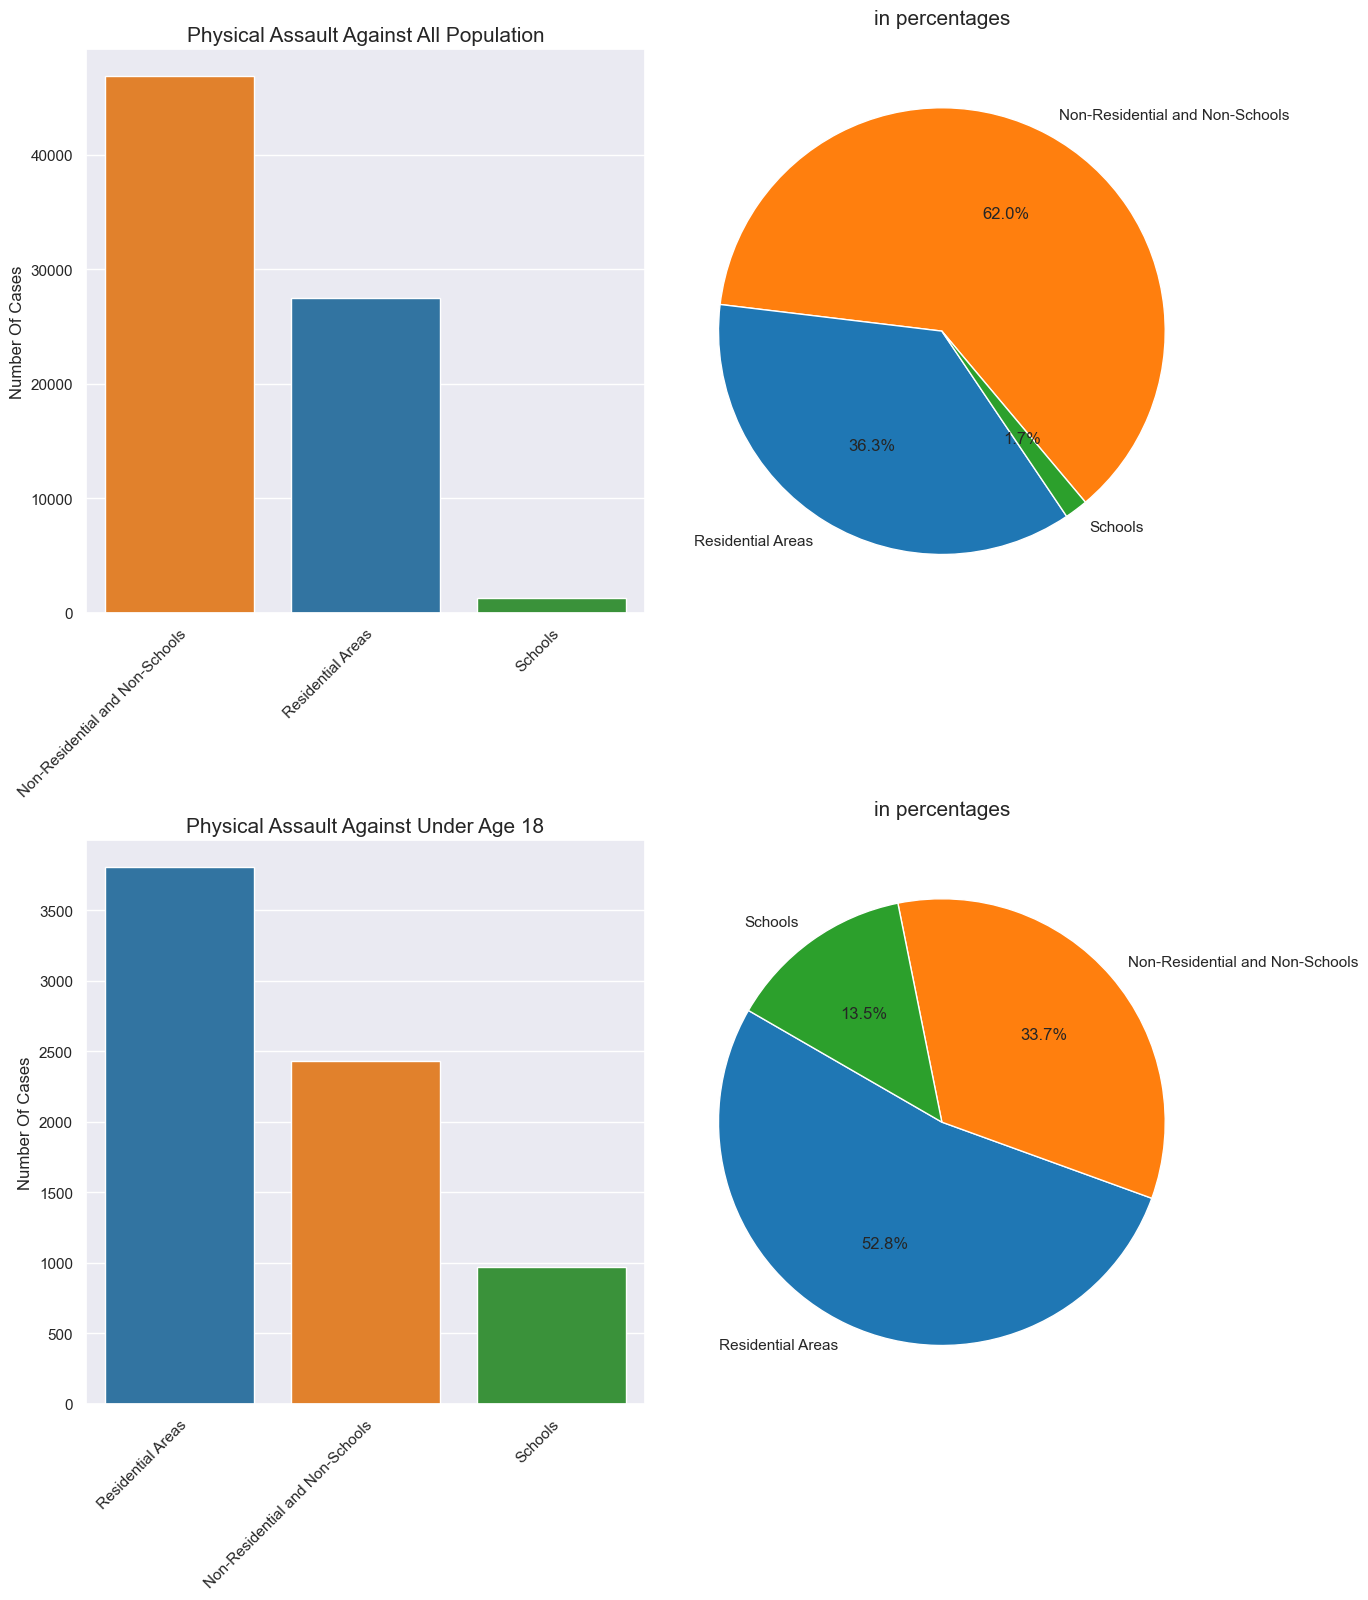

In [254]:
color_palette = {
    'Residential Areas': '#1f77b4',  # Blue
    'Non-Residential and Non-Schools': '#ff7f0e',  # Orange
    'Schools': '#2ca02c',  # Green
    'Unknown': '#d62728'  # Red
}

all_population_value_counts['color'] = all_population_value_counts['where_did_it_happen'].map(color_palette)
Under_age_18_df_value_counts['color'] = Under_age_18_df_value_counts['where_did_it_happen'].map(color_palette)


all_population_colors = [color_palette[label] for label in all_population_value_counts['where_did_it_happen']]
under_age_18_colors = [color_palette[label] for label in Under_age_18_df_value_counts['where_did_it_happen']]

fig, axs = plt.subplots(2, 2, figsize=(14, 16))


sns.barplot(data=all_population_value_counts, x='where_did_it_happen', y='count', ax=axs[0, 0], palette=all_population_value_counts['color'].tolist())
axs[0, 0].set_title('Physical Assault Against All Population', fontsize=15)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Number Of Cases')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


axs[0, 1].pie(all_population_value_counts['count'], 
              labels=all_population_value_counts['where_did_it_happen'], 
              colors=all_population_colors, autopct='%1.1f%%', startangle=310)
axs[0, 1].set_title('in percentages', fontsize=15, pad=20)


sns.barplot(data=Under_age_18_df_value_counts, x='where_did_it_happen', y='count', ax=axs[1, 0], palette=Under_age_18_df_value_counts['color'].tolist())
axs[1, 0].set_title('Physical Assault Against Under Age 18', fontsize=15)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Number Of Cases')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


axs[1, 1].pie(Under_age_18_df_value_counts['count'], 
              labels=Under_age_18_df_value_counts['where_did_it_happen'], 
              colors=under_age_18_colors, autopct='%1.1f%%', startangle=150)
axs[1, 1].set_title('in percentages', fontsize=15, pad=20)

plt.tight_layout()
plt.show()

ניתן לראות על פי הגרפים את ההבדלים כאשר מדובר על אלימות מתחת לגיל 18 רוב המקרם מתרחשים במתחמי מגורים ואילו כאשר מסתכלים על כלל האוכלוסייה רוב המקרים מתרחשים במרומות שהם לא מתחמי מגורים, וזה בא לידי ביטוי גם באחוזים

#### נבדוק את הפער בימי הדיווח

In [265]:
violance_residential_under18_df = Under_age_18_df[Under_age_18_df['where_did_it_happen'] == "Residential Areas"]

## Identity Thieves In Holonback

In [ ]:
<div style="text-align:center;">
    <img src="https://i.pinimg.com/236x/bf/95/b2/bf95b293aa8a0976d9e18d48014253e1.jpg" alt="תיאור התמונה" style="width: 30%;">
</div>

In [ ]:
<div style="text-align:center;">
    <img src="https://i.pinimg.com/236x/bf/95/b2/bf95b293aa8a0976d9e18d48014253e1.jpg" alt="תיאור התמונה" style="width: 30%;">
</div>

In [256]:
identity_theft = df[df["crime_description"] == "THEFT OF IDENTITY"]
len(identity_theft)
### 53467 
### מקרים של גניבת זהות איפה חיים אתגר בחישוב זריז מעל48 מקרים בממוצע ליום בשלוש שנים זה כבר בעיה 
### נחקוראת העניין 


53467

#### נעיף מבט על התפלגות הגילאים של הקורבנות

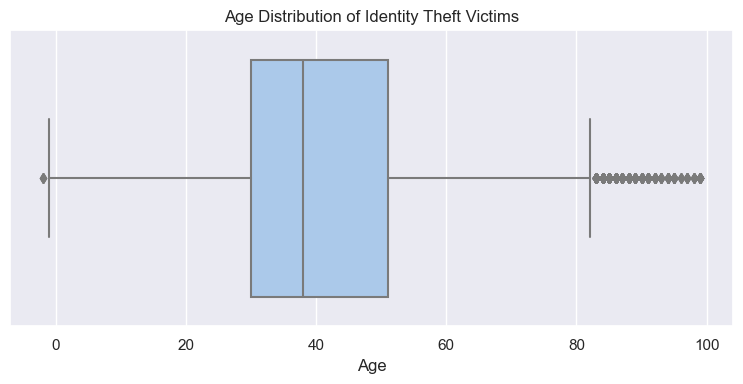

In [257]:
plt.figure(figsize=(15,4))


plt.subplot(1, 2, 1)
sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')
plt.title('Age Distribution of Identity Theft Victims')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [258]:
identity_theft_age0 = identity_theft[identity_theft['victim_age'] <= 0]
len(identity_theft_age0)


992


### We will analyze the crime areas where identity theft crimes happend



There are 992 age values that equle to 0 lower than 0. we chose to keep tham beacuse they are cases that happened. we assume that the reporters wanted to be anonymous or it's type error.
קיימים כ992 ערכים שהגיל שלהם הוא קטן או שווה ל 0 נבחר להשאיר אותם מכיוון שסביר שהמתלוננים בחרו להישאר בעילום שם או טעות בהקלדת הנתונים נבחר להשאירים כדי הם עדיין מקרים שקרו 

In [259]:
idt_by_area = identity_theft['area_name'].value_counts().reset_index()
idt_by_area.columns = ["area_name","amount"]
idt_by_area


,area_name,amount
0,77th Street,3849
1,Southeast,3431
2,Southwest,3323
3,Devonshire,2926
4,West LA,2902
5,Topanga,2826
6,N Hollywood,2820
7,West Valley,2797
8,Van Nuys,2780
9,Mission,2675



###  We will analyze the crime places where identity theft crimes happend

In [260]:
place_counts = identity_theft['premise_description'].value_counts().reset_index()
place_counts.columns = ['place', 'count']
place_counts.head(10)



,place,count
0,SINGLE FAMILY DWELLING,26250
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",12915
2,BANK,2452
3,AUTOMATED TELLER MACHINE (ATM),2205
4,CYBERSPACE,1592
5,OTHER BUSINESS,1249
6,STREET,1113
7,OTHER PREMISE,1072
8,OTHER RESIDENCE,550
9,WEBSITE,424


### Let's classify places involved with money and check in which areas these places are most common for identity theft.

In [261]:
selected_premises = [
    "BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK",
    "DRIVE THRU BANKING (WINDOW)",
    "BANKING INSIDE MARKET-STORE",
    "CHECK CASHING",
    "SAVINGS & LOAN",
    "FINANCE COMPANY",
    "CREDIT UNION",
    "AUTOMATED TELLER MACHINE (ATM)",
    "BANK"
]

idt = identity_theft[identity_theft['premise_description'].isin(selected_premises)]
idt_area_name = idt['area_name'].value_counts().reset_index()
idt_area_name.columns = ['area_name', 'amount']

idt_area_name


,area_name,amount
0,Hollenbeck,541
1,N Hollywood,496
2,Van Nuys,409
3,Devonshire,334
4,Rampart,332
5,Harbor,316
6,Northeast,299
7,Pacific,251
8,Foothill,233
9,Newton,231


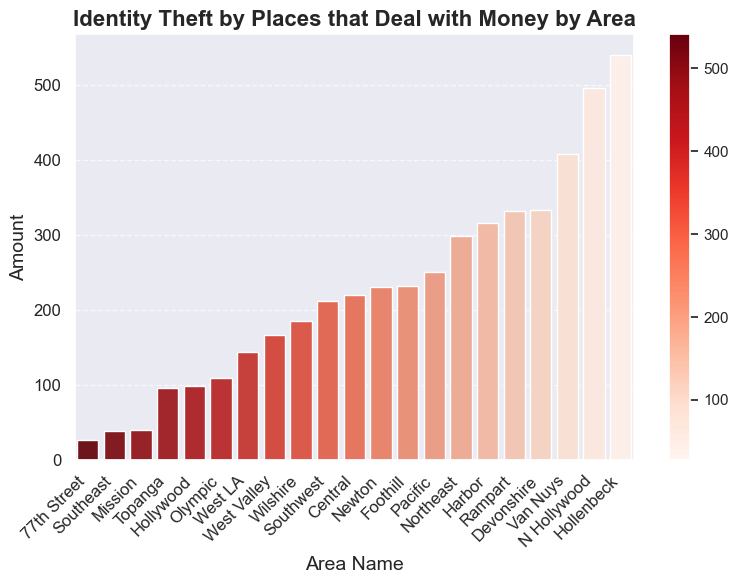

In [262]:
norm = plt.Normalize(idt_area_name['amount'].min(), idt_area_name['amount'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figsize for better visualization
colors = sm.to_rgba(idt_area_name['amount'])
palette = sns.color_palette("Reds", n_colors=len(idt_area_name['amount']))
sns.barplot(data=idt_area_name, x='area_name', y='amount', palette=palette, ax=ax, errorbar=None)

ax.set_title('Identity Theft by Places that Deal with Money by Area', fontsize=16, weight='bold')
ax.set_xlabel('Area Name', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('', fontsize=12)

ax.invert_xaxis()

plt.tight_layout()
plt.show()

### Hollonback is the area that ranks third from last overall in crime, but ranks first in crimes related to money.

### We will try to analyze which population suffers the most from identity theft in places primarily concerned with money in the Hollonback area.

idt_Hollenbeck = identity_theft[(identity_theft['premise_description'].isin(selected_premises)) & (identity_theft['area_name'] == 'Hollenbeck')]


idt_Hollenbeck_by_descent = idt_Hollenbeck['victim_descent'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']
idt_Hollenbeck_by_descent

NameError: name 'idt_Hollenbeck_by_descent' is not defined

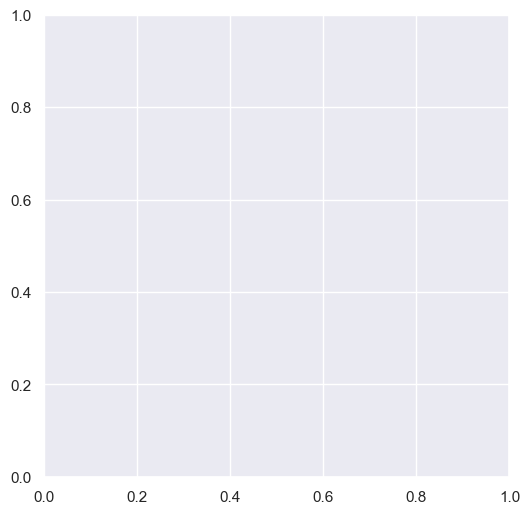

In [263]:
custom_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(6, 6))

# Bar plot with the custom color palette
sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=custom_palette, ax=ax)

ax.set_title("Number of crimes according to victim descent in places that deal with money in Hollenbeck ")
ax.set_xlabel("Victim Descent")
ax.set_ylabel("Amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### It can be seen that Hispanics suffer the most from identity theft in areas where their primary occupation is related to money.

In [ ]:
idt_by_descent =identity_theft['victim_descent'].value_counts().reset_index()
idt_by_descent.columns = ["victim_descent","amount"]


idt_area_name = idt_area_name.sort_values(by='amount', ascending=True)
idt_by_area = idt_by_area.sort_values(by='amount', ascending=True)

colors_area_name = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_area_name['area_name']]
colors_by_area = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_by_area['area_name']]



total_amount_hollenbeck = idt_Hollenbeck_by_descent['amount'].sum()
idt_Hollenbeck_by_descent['percentage'] = (idt_Hollenbeck_by_descent['amount'] / total_amount_hollenbeck) * 100


idt_Hollenbeck_by_descent['group'] = idt_Hollenbeck_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
grouped_data_hollenbeck = idt_Hollenbeck_by_descent.groupby('group').sum().reset_index()


total_amount = idt_by_descent['amount'].sum()
idt_by_descent['percentage'] = (idt_by_descent['amount'] / total_amount) * 100


idt_by_descent['group'] = idt_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
grouped_data_all = idt_by_descent.groupby('group').sum().reset_index()


fig, axs = plt.subplots(2, 2, figsize=(16, 12))


sns.barplot(data=idt_area_name, x='amount', y='area_name', palette=colors_area_name, ax=axs[0, 0], errorbar=None)
axs[0, 0].set_title('Identity Theft by Places that Deal with Money by Area', fontsize=16, weight='bold')
axs[0, 0].set_xlabel('Amount', fontsize=14)
axs[0, 0].set_ylabel('Area Name', fontsize=14)
axs[0, 0].tick_params(axis='x', labelsize=12)
axs[0, 0].tick_params(axis='y', labelsize=12)
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)


sns.barplot(data=idt_by_area, x='amount', y='area_name', palette=colors_by_area, ax=axs[0, 1], errorbar=None)
axs[0, 1].set_title('Identity Theft by Area in All Places', fontsize=16, weight='bold')
axs[0, 1].set_xlabel('Amount', fontsize=14)
axs[0, 1].set_ylabel('Area Name', fontsize=14)
axs[0, 1].tick_params(axis='x', labelsize=12)
axs[0, 1].tick_params(axis='y', labelsize=12)
axs[0, 1].grid(axis='x', linestyle='--', alpha=0.7)


sns.barplot(x='group', y='percentage', data=grouped_data_hollenbeck, palette=['red', 'blue'], ax=axs[1, 0])
for p in axs[1, 0].patches:
    percentage = f'{p.get_height():.1f}%'
    axs[1, 0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points')
axs[1, 0].set_title('Victim Descent Percentage in Hollenbeck', fontsize=16, weight='bold')
axs[1, 0].set_ylabel('Percentage', fontsize=14)
axs[1, 0].set_xlabel('Victim Descent', fontsize=14)
axs[1, 0].set_ylim(0, 100)


sns.barplot(x='group', y='percentage', data=grouped_data_all, palette=['red', 'blue'], ax=axs[1, 1])
for p in axs[1, 1].patches:
    percentage = f'{p.get_height():.1f}%'
    axs[1, 1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points')
axs[1, 1].set_title('Victim Descent Percentage in All Areas', fontsize=16, weight='bold')
axs[1, 1].set_ylabel('Percentage', fontsize=14)
axs[1, 1].set_xlabel('Victim Descent', fontsize=14)
axs[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
   First Conclusion
</div>


<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
   First Conclusion
</div>


## The Hispanic population is an "easy target" for identity thieves.

In [ ]:
<img src="">
``


## Burglaries Of Elderly Properties

<img src="https://newzim.co.il/merkaz/wp-content/uploads/sites/2/2018/03/%D7%9B%D7%A1%D7%A4%D7%95%D7%9E%D7%98-2048x1365.jpg" alt="תיאור התמונה" style="width: 60%; display: block; margin-left: auto; margin-right: auto;">
``



In [ ]:
### פריצות לנכנסים של האוכלוסייה המבוגרת 

In [266]:
old_df = df[df["age_description"]== "old"]

old_df_crime_description = old_df['crime_description'].value_counts().reset_index()
old_df_crime_description.columns = ['crime_description', 'count']

old_df_crime_description.head(20)


,crime_description,count
0,BATTERY - SIMPLE ASSAULT,9901
1,BURGLARY,8426
2,THEFT OF IDENTITY,7226
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5190
4,THEFT PLAIN - PETTY ($950 & UNDER),5010
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,4778
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4681
7,BURGLARY FROM VEHICLE,4323
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",3131
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2983


C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\2863840817.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



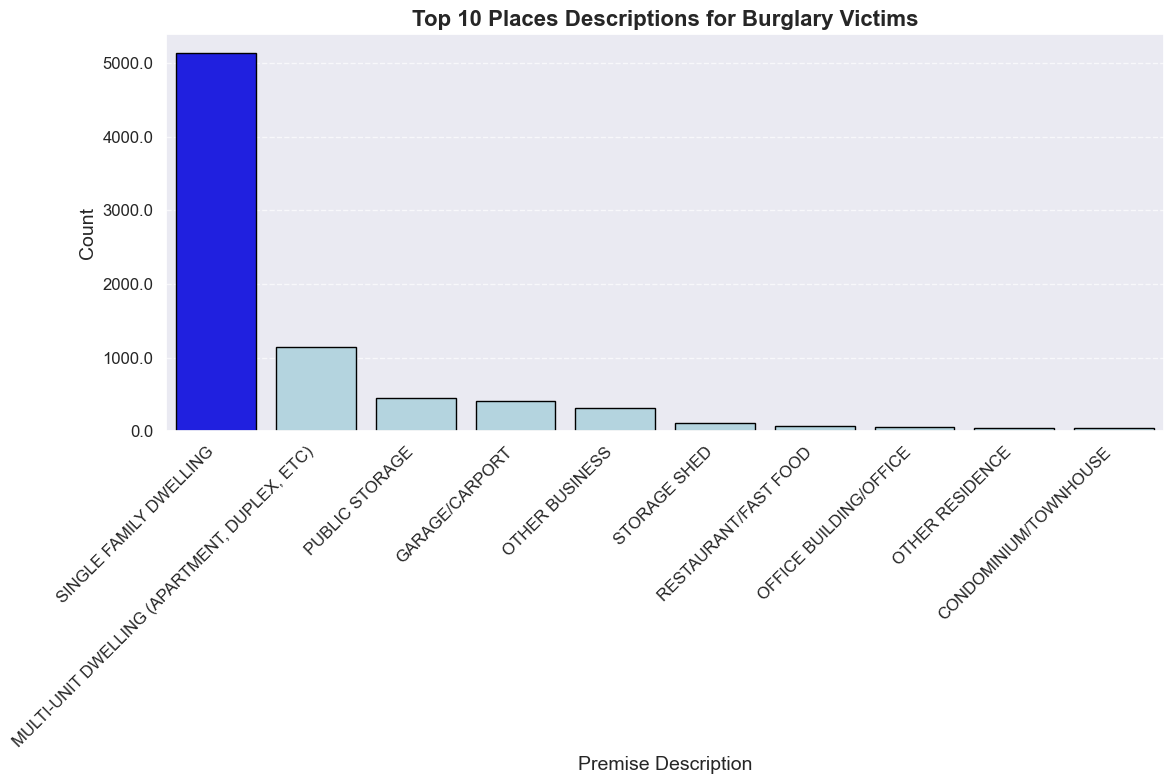

In [267]:
old_burglary_df = old_df[old_df["crime_description"] == "BURGLARY"]
premise_description_counts = old_burglary_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
top_10_premise_descriptions = premise_description_counts.head(10)


fig, ax = plt.subplots(figsize=(12, 8))


colors = ['lightblue' if count != top_10_premise_descriptions['count'].max() else 'blue' for count in top_10_premise_descriptions['count']]


sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black', ax=ax)


ax.set_xlabel('Premise Description', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Top 10 Places Descriptions for Burglary Victims', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

### According to the diagram, it seems that the most common crime against the elderly is burglary of their property.

### We'll check if there's a trend of increase or decrease in cases over the years.

In [268]:
old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year
yearly_counts_old_burglary_df = old_burglary_df['year_occurred'].value_counts().reset_index()
yearly_counts_old_burglary_df.columns = ['year', 'amount_burglaries']
yearly_counts_old_burglary_df


C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\3942132489.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,amount_burglaries
0,2023,2393
1,2022,2271
2,2021,1899
3,2020,1863


C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\1128514167.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



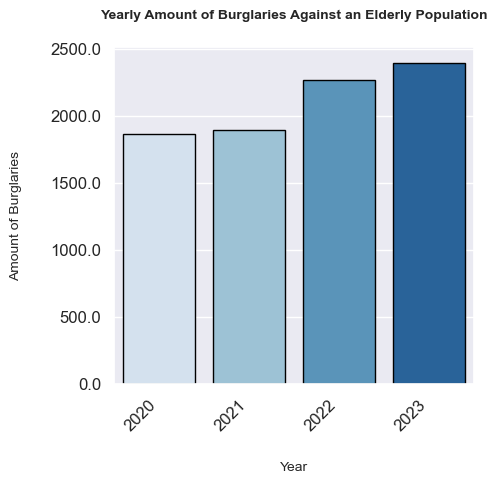

In [269]:
yearly_counts_old_burglary_df['year'] = yearly_counts_old_burglary_df['year'].astype(int)


fig, ax = plt.subplots(figsize=(5,5))


sns.barplot(x='year', y='amount_burglaries', data=yearly_counts_old_burglary_df, palette="Blues", edgecolor='black', ax=ax)


ax.set_xlabel('Year', fontsize=10, labelpad=20)
ax.set_ylabel('Amount of Burglaries', fontsize=10, labelpad=20)
ax.set_title('Yearly Amount of Burglaries Against an Elderly Population', fontsize=10, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.yaxis.get_major_locator().set_params(integer=True)


plt.tight_layout()
plt.show()

### There has been an increase over the years in the number of burglaries targeting the elderly population

### We will try to understand the number of perpetrators involved in burglaries.

In [270]:
status_description_counts = old_burglary_df['status_description'].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']
status_description_counts

,status_description,count
0,Invest Cont,7716
1,Adult Arrest,521
2,Adult Other,185
3,Juv Arrest,4


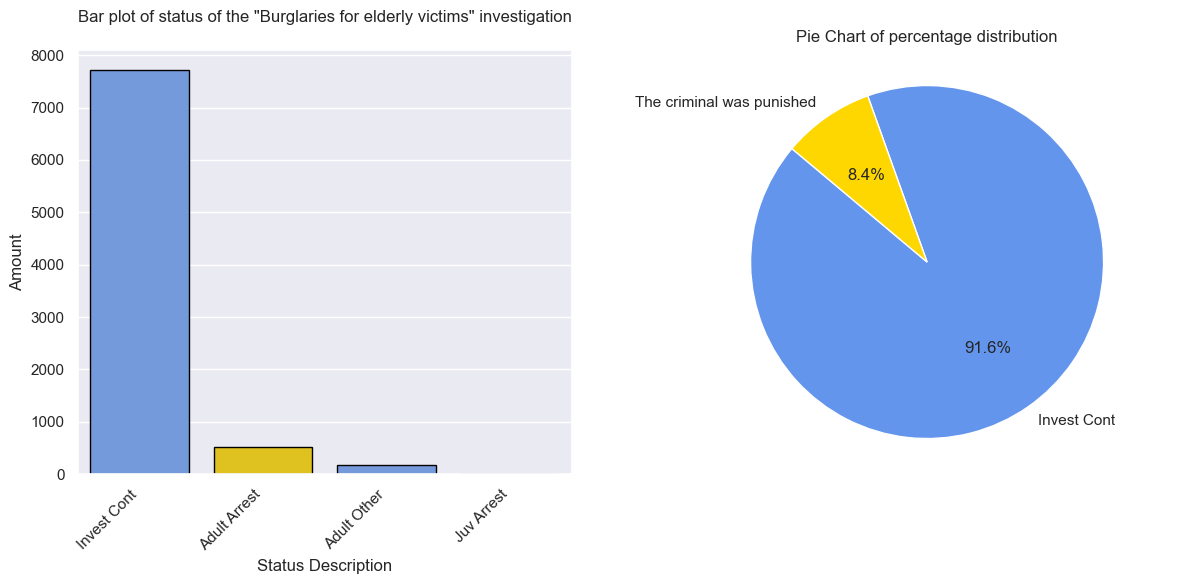

In [271]:
invest_cont_count = status_description_counts[status_description_counts['status_description'] == "Invest Cont"]['count'].sum()
other_count = status_description_counts['count'].sum() - invest_cont_count

status_description_simplified = pd.DataFrame({
    'status_description': ['Invest Cont', 'The criminal was punished'],
    'count': [invest_cont_count, other_count]
})


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


colors = ["#6495ED", "#FFD700"]
axes[1].pie(status_description_simplified['count'], labels=status_description_simplified['status_description'], autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title('Pie Chart of percentage distribution')
axes[1].axis('equal')


sns.barplot(x='status_description', y='count', data=status_description_counts, palette=colors, edgecolor='black', ax=axes[0])


axes[0].set_xlabel('Status Description')
axes[0].set_ylabel('Amount')
axes[0].set_title('Bar plot of status of the "Burglaries for elderly victims" investigation',fontsize=12, pad=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

### According to the graphs, nearly all reported cases of burglaries involve elderly individuals, with investigations remaining open, indicating that most burglars are not apprehended.

### We will check if there is a trend of increase or decrease in the number of criminals punished over the years.

In [272]:
status_description_yearly_counts = old_burglary_df.groupby(['year_occurred', 'status_description']).size().reset_index(name='count')


pivot_table = status_description_yearly_counts.pivot(index='year_occurred', columns='status_description', values='count').fillna(0)


pivot_table

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest
year_occurred,,,,
2020,147.0,69.0,1646.0,1.0
2021,146.0,38.0,1715.0,0.0
2022,132.0,45.0,2092.0,2.0
2023,96.0,33.0,2263.0,1.0


In [273]:
required_columns = ['Adult Arrest', 'Adult Other', 'Juv Arrest']
for col in required_columns:
    if col not in pivot_table.columns:
        pivot_table[col] = 0


result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)

result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']
result_df

,Year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [274]:
result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)
result_df.columns = ['year', 'Invest Cont', 'criminals_punished']
result_df

,year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [275]:
result_subset = result_df[['criminals_punished', 'year']]
yearly_counts_subset = yearly_counts_old_burglary_df[['amount_burglaries', 'year']]


final_df = pd.merge(result_subset, yearly_counts_subset, on='year')


final_df = final_df[['year', 'amount_burglaries', 'criminals_punished']]
final_df


,year,amount_burglaries,criminals_punished
0,2020,1863,217.0
1,2021,1899,184.0
2,2022,2271,179.0
3,2023,2393,130.0


### We will check the correlation between the increase in the number of burglaries and the decrease in the number of burglars caught in recent years.

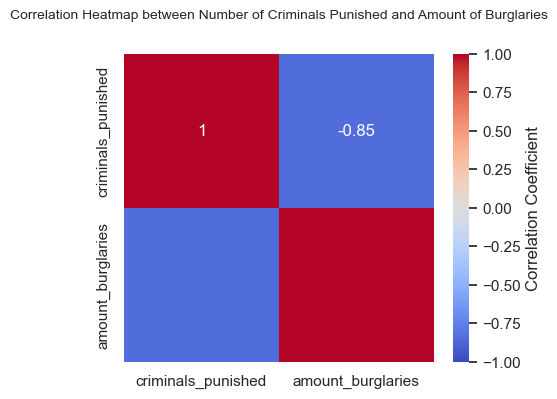

In [276]:
correlation_data = final_df[['criminals_punished', 'amount_burglaries']]
correlation_matrix = correlation_data.corr()


plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap between Number of Criminals Punished and Amount of Burglaries', fontsize=10 , pad=25)
plt.show()






### Based on correlation data, it can be inferred that there is a trend where as the number of prosecuted offenders decreases, the number of burglaries increases. This correlation, estimated at -0.85, indicates a strong negative relationship between the two phenomena.

sns.set_theme(style="whitegrid")


final_df['year'] = final_df['year'].astype(int)
result_df['year'] = result_df['year'].astype(int)


plt.figure(figsize=(8, 6))


sns.lineplot(x='year', y='amount_burglaries', data=final_df, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Yearly amount of Burglaries against an elders population')
sns.lineplot(x='year', y='criminals_punished', data=result_df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Criminals punished')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Yearly amount of Burglaries against an elders population and Criminals punished', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Second Conclusion
</div>


## The police are not effective in protecting the elderly population from burglaries of homes, properties, and businesses, which is the most affected population - both in preventing and eradicating the phenomenon, as well as in handling existing cases. 


<div style="text-align:center;">
    <img src="https://i.pinimg.com/236x/93/74/06/937406df9143e80ebaa82e96919fba8e.jpg" alt="תיאור התמונה" style="width: 30%;">
</div>

In [277]:
firearm_df = df[df["weapon_category"] == "firearm"] 
sharp_weapon_df = df[df["weapon_category"] == "Physical strength"]

area_name_counts = firearm_df['area_name'].value_counts().reset_index()

area_name_counts.columns = ['area_name', 'count']





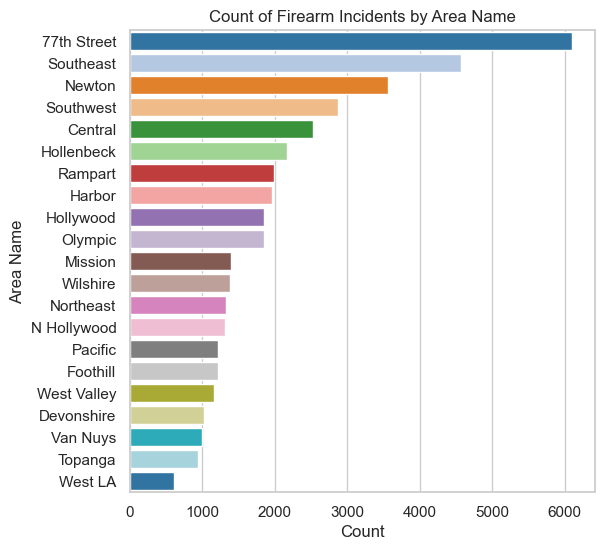

In [278]:
palette = sns.color_palette("tab20", len(area_name_counts))


sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(6,6))


bar_plot = sns.barplot(data=area_name_counts, y='area_name', x='count', palette=palette, ax=ax)


ax.set_title('Count of Firearm Incidents by Area Name')
ax.set_xlabel('Count')
ax.set_ylabel('Area Name')

plt.show()

ניתן לראות שהאיזור הכי בעייתי מבחינת פשעים שבצעו מבחינת נשק חם הוא רחוב 77 נתמקד בו

נבדוק מה המקומות בהם נעשים הכי הרבה פעשים בעזרת שימוש בנשק חם רחוב 77

In [279]:
th77_firearm_df = firearm_df[firearm_df["area_name"] =="77th Street"]
premise_description_counts = th77_firearm_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
premise_description_counts.head(10)

,premise_description,count
0,STREET,3041
1,SINGLE FAMILY DWELLING,744
2,SIDEWALK,587
3,PARKING LOT,342
4,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",294
5,ALLEY,138
6,OTHER BUSINESS,105
7,GAS STATION,96
8,DRIVEWAY,85
9,"VEHICLE, PASSENGER/TRUCK",57


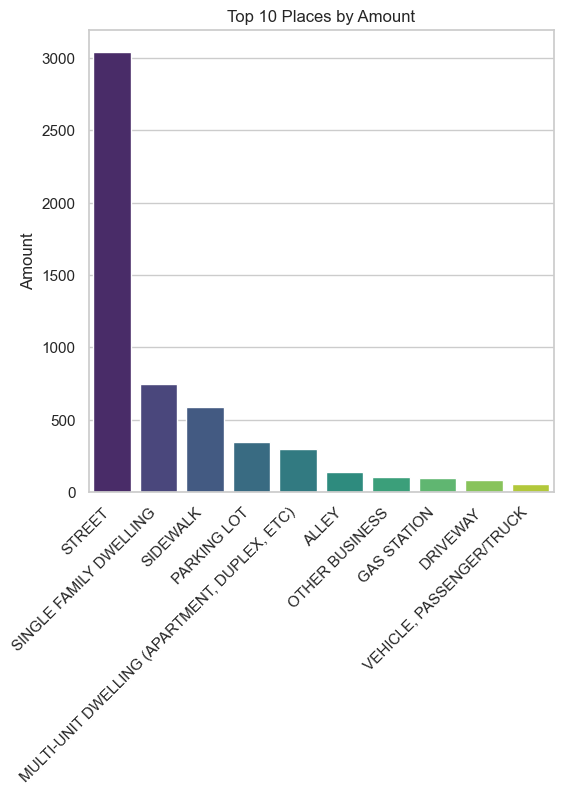

In [280]:
fig, ax = plt.subplots(figsize=(6,6))


palette = sns.color_palette("viridis", n_colors=10)
sns.barplot(x='premise_description', y='count', data=premise_description_counts.head(10), ax=ax, palette=palette)


ax.set_title('Top 10 Places by Amount')
ax.set_xlabel('')
ax.set_ylabel('Amount')


plt.xticks(rotation=45,ha = "right")


plt.show()

נניתן לראות שבפער ניקר מהמקום השני הכי הרבה פשעים ששומשו בעזרת נשק חם קרו ברחוב 

ניצור עמודה חדשה שתתן שתיתן לנו מידע האם הפשע בוצע במקום ציבורי או פרטי

In [281]:
public_places = [
    'TRAIN TRACKS',
    'TOW YARD',
    'OTHER/OUTSIDE',
    'TUNNEL',
    'VACANT LOT',
    'SWAP MEET',
    'FREEWAY',
    'SHOPPING MALL (COMMON AREA)',
    'PARK/PLAYGROUND',
    'MARKET',
    'BUS STOP',
    'GAS STATION',
    'ALLEY',
    'PARKING LOT',
    'SIDEWALK',
    'STREET',
    "TRANSIENT ENCAMPMENT",
]


th77_firearm_df['public_or_private'] = th77_firearm_df['premise_description'].apply(lambda x: 'public place' if x in public_places else 'private place')


C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\1325836332.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
public_private_counts = th77_firearm_df['public_or_private'].value_counts().reset_index()
public_private_counts.columns = ["public_or_private", "count"]
public_private_counts

,public_or_private,count
0,public place,4306
1,private place,1800


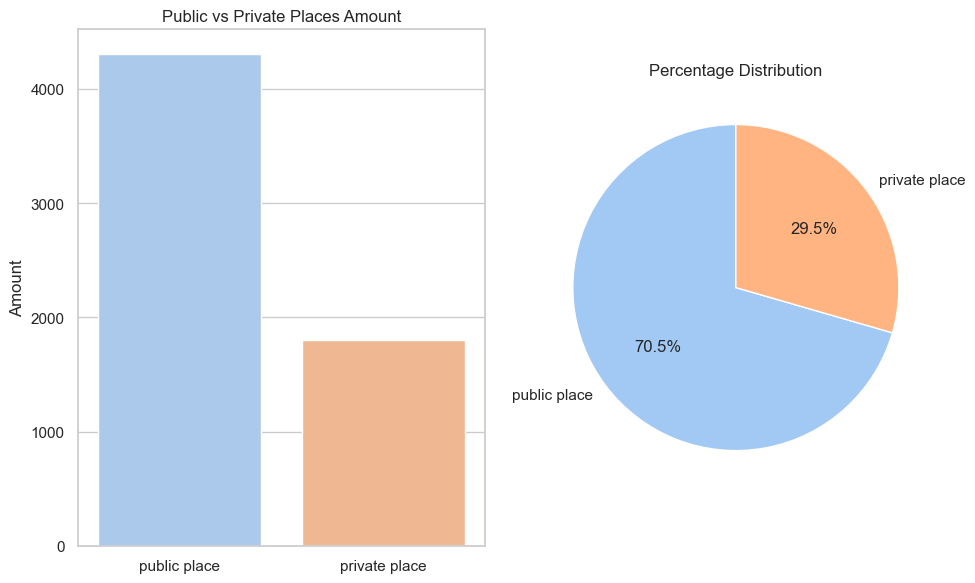

In [283]:
colors = sns.color_palette("pastel")[0:2]


fig, axes = plt.subplots(1, 2, figsize=(10,6))


sns.barplot(x='public_or_private', y='count', data=public_private_counts, ax=axes[0], palette=colors)
axes[0].set_title('Public vs Private Places Amount')
axes[0].set_xlabel('')
axes[0].set_ylabel('Amount')


axes[1].pie(public_private_counts['count'], labels=public_private_counts['public_or_private'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Percentage Distribution')


plt.tight_layout()
plt.show()

כמו שחשבנו בפער ניכר השימוש בנשק לצרוך ביצוע עיברות, גדול בהרבה כאשר הפשע מתבצע במקומות ציבוריים

נבדוק מה קרה עם פשעים שבוצעו בעזרת נשק חם לאורך השנים

ניתן להבין על פי הגרף שהמשטרה ברחוב 77 עושה עבודה מעולה ואכן מצליחה להוריד את כמות הפשעים משנה לשנה

In [284]:
area_year_counts = th77_firearm_df.groupby(['public_or_private', 'year_occurred']).size().reset_index(name='count')




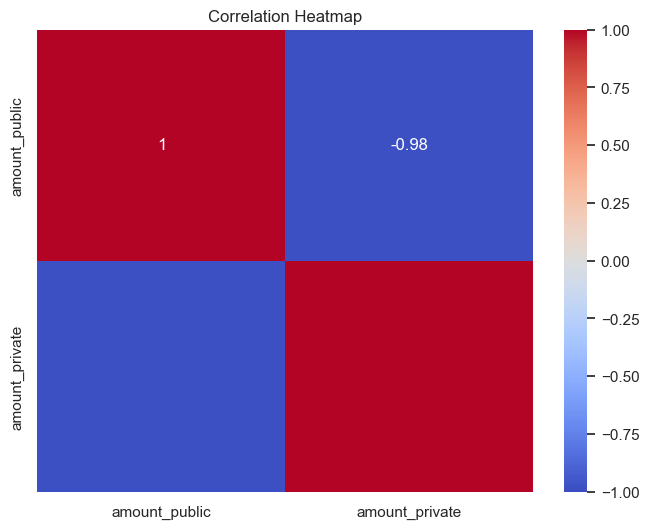

In [285]:
public_counts = area_year_counts[area_year_counts['public_or_private'] == 'public place'][['year_occurred', 'count']].rename(columns={'count': 'amount_public'})
private_counts = area_year_counts[area_year_counts['public_or_private'] == 'private place'][['year_occurred', 'count']].rename(columns={'count': 'amount_private'})


merged_counts = pd.merge(public_counts, private_counts, on='year_occurred', how='outer')


merged_counts.fillna(0, inplace=True)


correlation_matrix = merged_counts[['amount_public', 'amount_private']].corr()


plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Correlation Heatmap')


plt.show()


הקורלציה החזקה והשלילית מתארת את הקשר שבין המקרים ככול שכמות הפשעים שבוצעו בעזרת נשק חם בשכונת 77 יורדים, אנו נקבל עלייה בכמות הפשעים שבוצעו בנשק חם במקומות פרטיים

C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



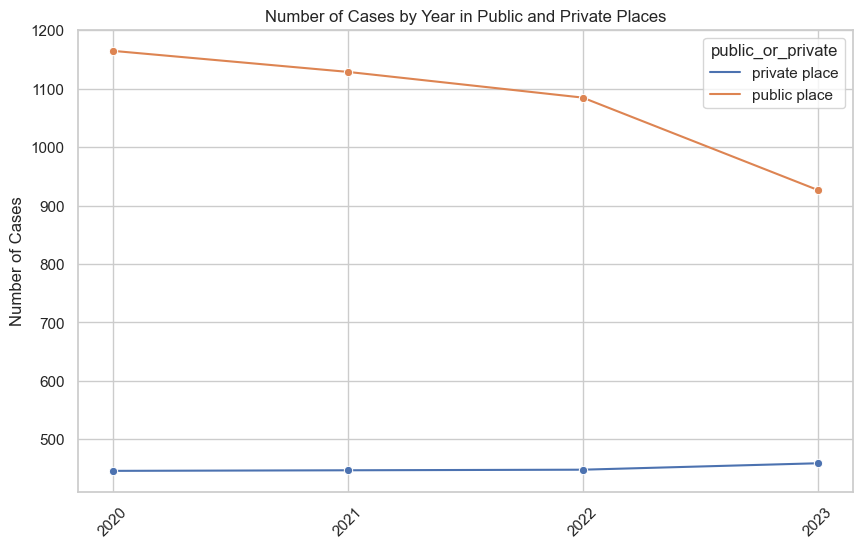

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))


sns.lineplot(data=area_year_counts, x='year_occurred', y='count', hue='public_or_private', marker='o', ax=ax)


ax.set_title('Number of Cases by Year in Public and Private Places')
ax.set_xlabel('')
ax.set_ylabel('Number of Cases')


ax.set_xticks(area_year_counts['year_occurred'].unique())
ax.set_xticklabels(area_year_counts['year_occurred'].unique(), rotation=45)


plt.show()

#### מסקנה 4

ניתן להסיק כי בשנים באחרות ישנה ירידה בכמות הפשעים נעשים תוך כדי שימוש בנשק חם בפשעים שנעשים במקומות ציבוריים בשכונה 77, אך מנגד כמות הפשעים שמבוצעים באמצעות נשק חם במקומות הפרטיים בשכונה נשאר במצב יחסית סטטי, אפילו נחל עלייה מינורית אנו סבורים שהמשטרה משקיעה את מירב המאמצים בפשעים שמתבצעים במקומות ציבוריים וברחובות, ופחות מתמקדת במקומות הפרטיים, מה שמשאיר את הכמות במצב יחסית סטטי

## Pickpocket In Los Angeles

In [287]:
chipopo_df = df[df["crime_description"] == "PICKPOCKET"]



In [288]:
area_name_counts = chipopo_df['area_name'].value_counts().reset_index()
area_name_counts.columns = ['area_name', 'count']
area_name_counts

,area_name,count
0,Central,539
1,Hollywood,510
2,Southwest,264
3,Wilshire,185
4,Olympic,154
5,Newton,112
6,Northeast,112
7,Rampart,96
8,Pacific,89
9,West LA,83


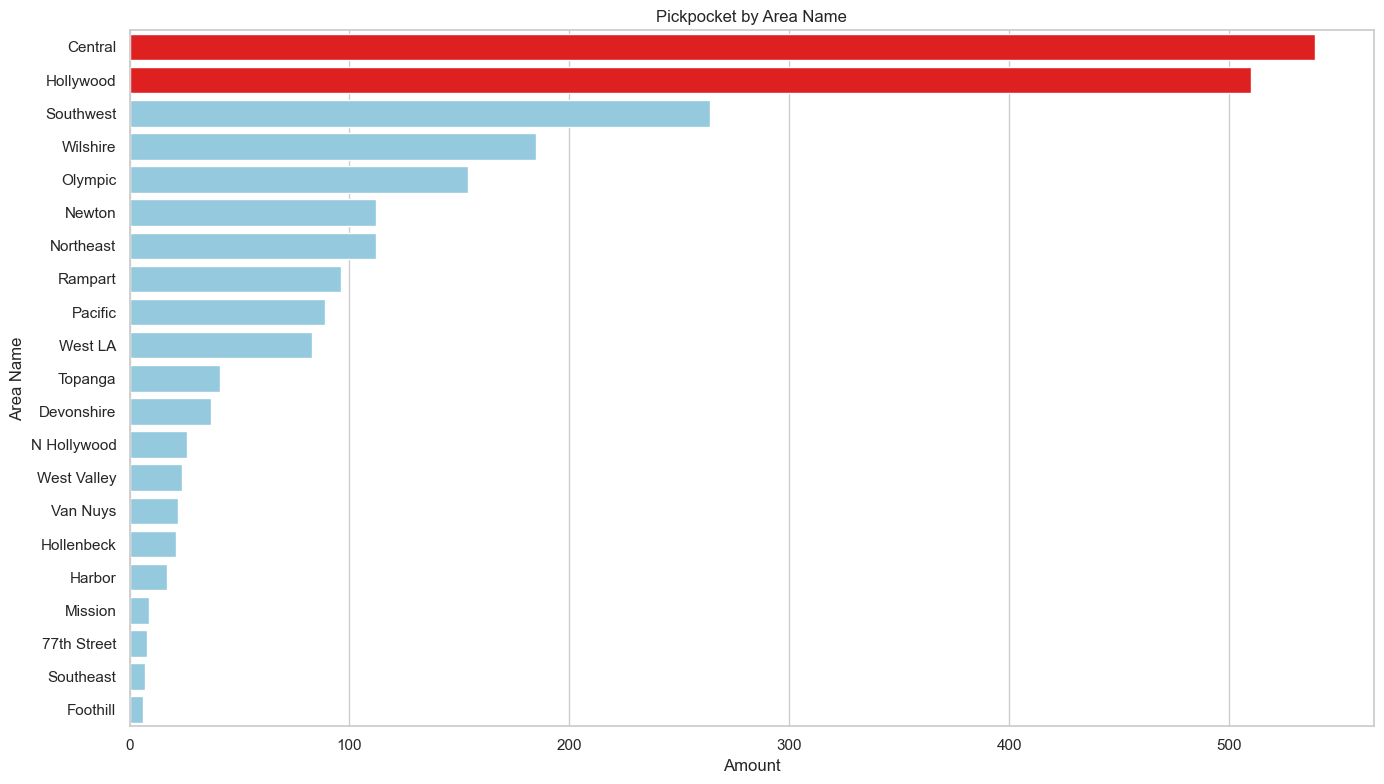

In [289]:
colors = ['red' if area in ['Central', 'Hollywood'] else 'skyblue' for area in area_name_counts['area_name']]

# Create a bar plot for all area names with highlighted areas
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='area_name', data=area_name_counts, palette=colors)

plt.title('Pickpocket by Area Name')
plt.xlabel('Amount')
plt.ylabel('Area Name')
plt.tight_layout()

# Show the plot
plt.show()

### The majority of pickpocketing incidents occur in Hollywood and Central.

In [290]:
CentralANDHollywood_df = chipopo_df[chipopo_df['area_name'].isin(['Central', 'Hollywood'])]
hour_counts_ch = CentralANDHollywood_df['hour_occurred'].value_counts().reset_index()
hour_counts_ch.columns = ['hour_occurred', 'count']

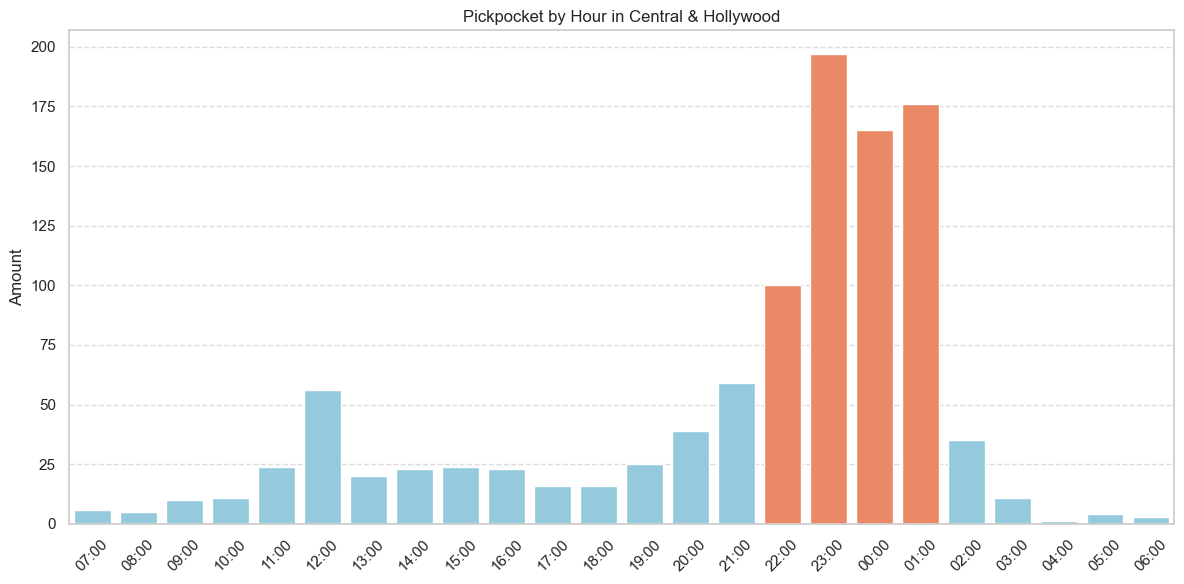

In [291]:
custom_order = list(range(7, 24)) + list(range(0, 7))


hour_counts_ch['hour_occurred'] = pd.Categorical(hour_counts_ch['hour_occurred'], categories=custom_order, ordered=True)
hour_counts_ch = hour_counts_ch.sort_values('hour_occurred').reset_index(drop=True)


colors = ['coral' if (hour >= 22 or hour <= 1) else 'skyblue' for hour in custom_order]


fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=hour_counts_ch['hour_occurred'].astype(str), y=hour_counts_ch['count'], palette=colors, ax=ax)


hour_labels = [f'{hour:02d}:00' for hour in custom_order]


ax.set_xticks(range(len(custom_order)))
ax.set_xticklabels(hour_labels, rotation=45)

ax.set_xlabel('')
ax.set_ylabel('Amount')
ax.set_title('Pickpocket by Hour in Central & Hollywood')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

### Pickpockets operate primarily during the evening and nighttime hours.

In [292]:
day_of_week_counts = CentralANDHollywood_df['day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['day_of_week', 'count']
day_of_week_counts

,day_of_week,count
0,Saturday,406
1,Sunday,241
2,Friday,221
3,Thursday,72
4,Monday,42
5,Tuesday,38
6,Wednesday,29


C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



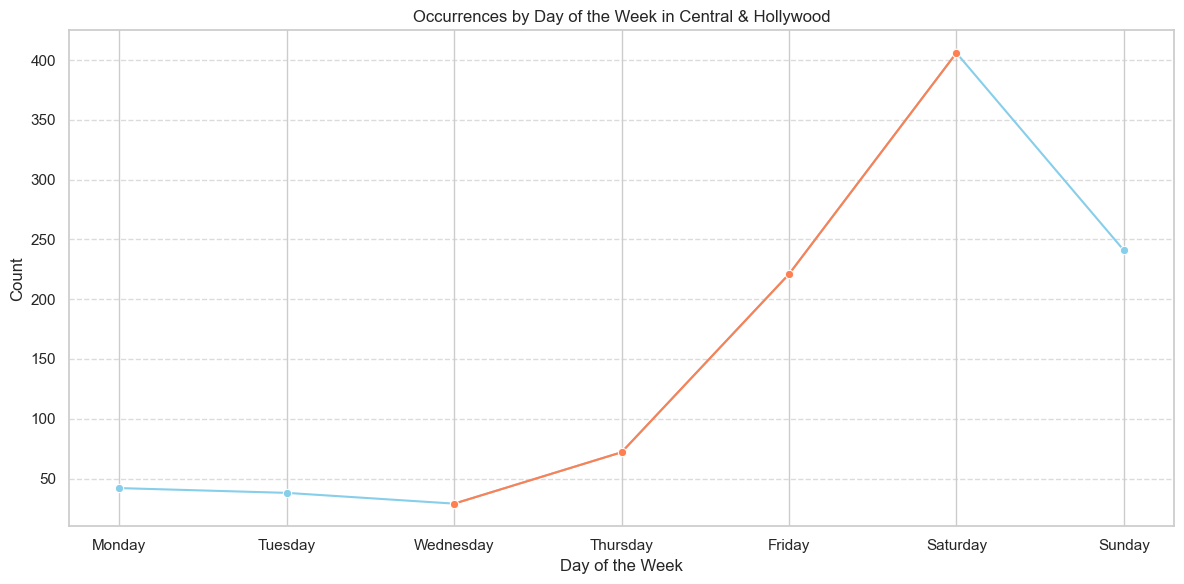

In [293]:
if 'day_of_week' not in CentralANDHollywood_df.columns:
    CentralANDHollywood_df['day_of_week'] = CentralANDHollywood_df['date_occurred'].dt.day_name()

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_counts['day_of_week'] = pd.Categorical(day_of_week_counts['day_of_week'], categories=custom_order, ordered=True)
day_of_week_counts = day_of_week_counts.sort_values('day_of_week').reset_index(drop=True)


highlight_days = ['Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['coral' if day in highlight_days else 'skyblue' for day in day_of_week_counts['day_of_week']]


plt.figure(figsize=(12, 6))


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts, marker='o', color='skyblue')


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts[day_of_week_counts['day_of_week'].isin(highlight_days)], marker='o', color='coral')

plt.title('Occurrences by Day of the Week in Central & Hollywood')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

### There is a sharp increase in pickpocketing incidents towards the weekend compared to other weekdays.

In [294]:
premise_description_counts = CentralANDHollywood_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
premise_description_counts

,premise_description,count
0,NIGHT CLUB (OPEN EVENINGS ONLY),319
1,BAR/COCKTAIL/NIGHTCLUB,216
2,BAR/SPORTS BAR (OPEN DAY & NIGHT),83
3,STREET,67
4,PARK/PLAYGROUND,65
...,...,...
58,VACANT LOT,1
59,OTHER STORE,1
60,MTA - RED LINE - HOLLYWOOD/HIGHLAND,1
61,METROLINK TRAIN,1


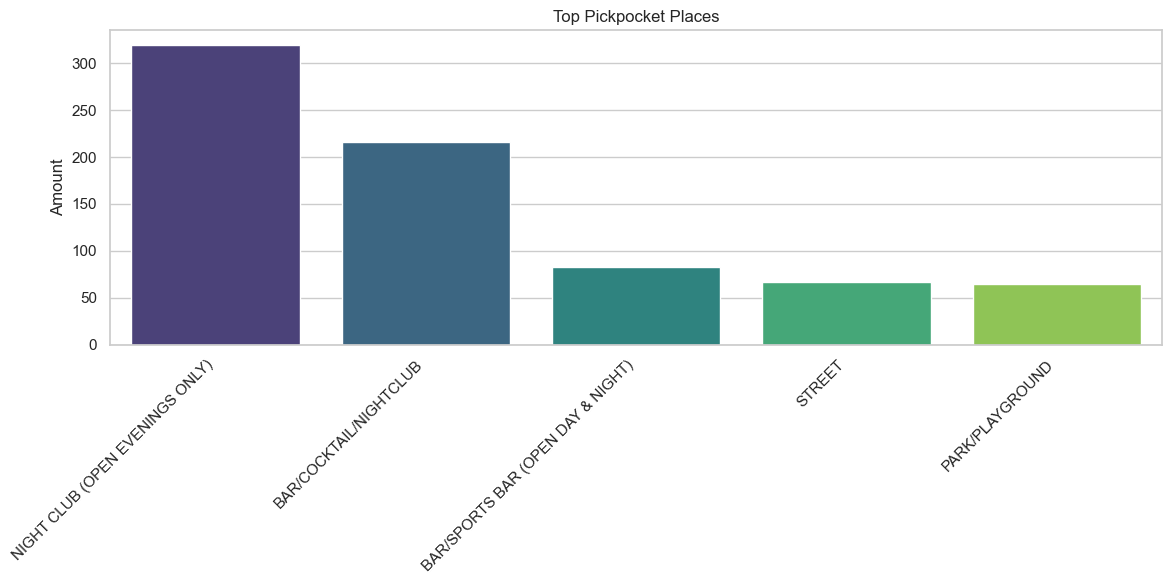

In [295]:
top_5_premise_description_counts = premise_description_counts.head(5)


plt.figure(figsize=(12, 6))
sns.barplot(x='premise_description', y='count', data=top_5_premise_description_counts, palette='viridis')

plt.title('Top Pickpocket Places')
plt.xlabel('')
plt.ylabel('Amount')
plt.xticks(rotation=45,ha = "right")
plt.tight_layout()


plt.show()

### The leading locations for pickpocketing are entertainment venues.

### Let's create a new column to help us understand how many cases occurred at entertainment venues.

In [296]:
hang_out_places = [
    'STAPLES CENTER *', 'BAR/COCKTAIL/NIGHTCLUB',
    'SHOPPING MALL (COMMON AREA)', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.',
    'BEACH', 'BAR/SPORTS BAR (OPEN DAY & NIGHT)', 'RESTAURANT/FAST FOOD',
    'COLISEUM', 'MINI-MART', 'NIGHT CLUB (OPEN EVENINGS ONLY)', 'THE GROVE',
    'CLOTHING STORE', 'CONVENTION CENTER', 'DEPARTMENT STORE',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)", 'LIQUOR STORE',
    'SPORTS VENUE, OTHER', 'THEATRE/MOVIE', 'SPORTS ARENA',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)', 'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)", 'THE BEVERLY CONNECTION',
    'DODGER STADIUM', 'HOTEL', '*', 'MUSEUM', 'AMUSEMENT PARK*',
    'YARD (RESIDENTIAL/BUSINESS)', 'MASS GATHERING LOCATION',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB", 'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*'
]


CentralANDHollywood_df['hang-out place'] = CentralANDHollywood_df['premise_description'].isin(hang_out_places)

C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\2063039858.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\תומר\AppData\Local\Temp\ipykernel_13588\4204958537.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



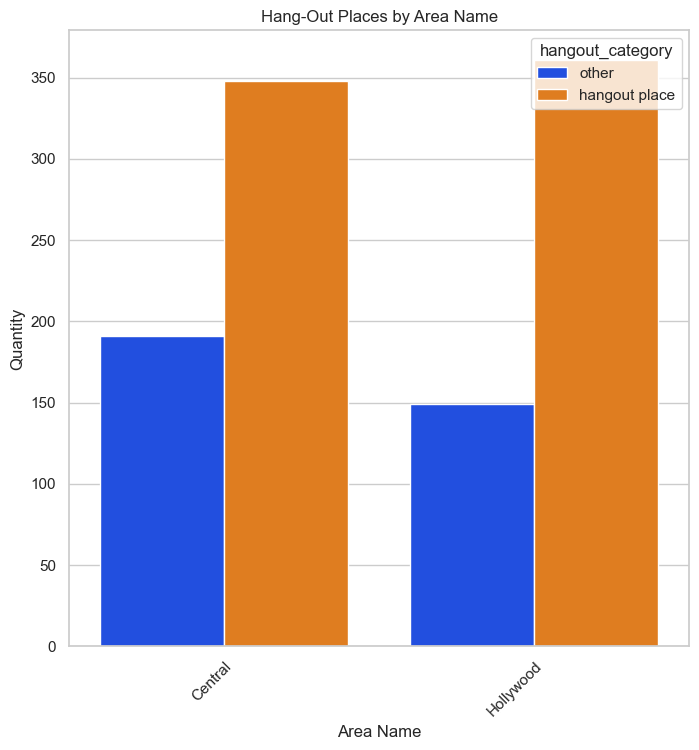

In [297]:
CentralANDHollywood_df['hangout_category'] = CentralANDHollywood_df['hang-out place'].apply(lambda x: 'hangout place' if x else 'other')


fig, ax = plt.subplots(figsize=(8,8))


sns.countplot(data=CentralANDHollywood_df, x='area_name', hue='hangout_category', ax=ax, palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('Hang-Out Places by Area Name')
ax.set_xlabel('Area Name')
ax.set_ylabel('Quantity')

plt.show()












### Both in Central and Hollywood, most incidents occur primarily at entertainment venues.

### We will check what has happened over the years regarding pickpocketing in Hollywood and Central.

In [298]:
plt.figure(figsize=(10,8))


for area in grouped_df['area_name'].unique():
    area_data = grouped_df[grouped_df['area_name'] == area]
    plt.plot(area_data['year_occurred'], area_data['count'], marker='o', label=area)


plt.xlabel('Year')
plt.ylabel('Aount')
plt.title('Amount of Pickpockt by Year in Hollywood And Central')
plt.xticks(grouped_df['year_occurred'].unique())  
plt.legend(title='Area')


plt.grid(True)
plt.show()

NameError: name 'grouped_df' is not defined

<Figure size 1000x800 with 0 Axes>

### There has been a notable rise in pickpocketing incidents in both areas between 2020 and 2022. However, it appears that there was a decrease in Hollywood from 2022 to 2023, whereas Central saw an increase during the same period.

In [ ]:
status_description_counts = CentralANDHollywood_df["status_description"].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']


In [ ]:
status_description_counts['percentage'] = (status_description_counts['count'] / status_description_counts['count'].sum()) * 100

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(status_description_counts['percentage'], labels=status_description_counts['status_description'], autopct='%1.1f%%', startangle=90)
ax.set_title('Status Description Counts as Percentages')

plt.show()
status_description_counts

In [ ]:
<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Third Conclusion
</div>


In [ ]:
## The central entertainment venues in Los Angeles experience the highest number of pickpocketing crimes, especially on weekends and at night, and the police do not address these cases.

In [ ]:
<div style="text-align:center;">
    <img src="https://i.pinimg.com/236x/fe/63/aa/fe63aa4a1331e545260f89a2d79d1851.jpg" alt="תיאור התמונה" style="width: 30%;">
</div>
